Com cerca de 5 milhões de quilômetros quadrados, a floresta Amazônica ocupa 60% do território do Brasil, onde abrange os Estados do Acre, Amapá, Amazonas, Mato Grosso, Maranhão, Pará, Roraima, Rondônia e Tocantins.... - Veja mais em https://educacao.uol.com.br/disciplinas/ciencias/floresta-amazonica-a-maior-floresta-tropical-do-mundo.htm?cmpid=copiaecola


https://educacao.uol.com.br/disciplinas/ciencias/floresta-amazonica-a-maior-floresta-tropical-do-mundo.htm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import lazypredict
from lazypredict.Supervised import LazyRegressor

import statsmodels.api as sm

from fbprophet import Prophet

/home/elisio/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('data/amazon.csv', encoding ="iso-8859-1")#, parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.00,1998-01-01
1,1999,Acre,Janeiro,0.00,1999-01-01
2,2000,Acre,Janeiro,0.00,2000-01-01
3,2001,Acre,Janeiro,0.00,2001-01-01
4,2002,Acre,Janeiro,0.00,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.00,2012-01-01
6450,2013,Tocantins,Dezembro,85.00,2013-01-01
6451,2014,Tocantins,Dezembro,223.00,2014-01-01
6452,2015,Tocantins,Dezembro,373.00,2015-01-01


In [3]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

The column date is wrong, therefore will be dropped.

In [4]:
df.drop(columns=['date'], inplace=True)

In [5]:
df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [6]:
df.replace({'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04',
            'Maio': '05', 'Junho': '06', 'Julho': '07', 'Agosto': '08',
            'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'}, inplace=True)

In [7]:
df.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [8]:
#df['date'] = df['month'] + '-' + df['year'].astype('str')
df['date'] = df['year'].astype('str') + df['month']
df

,year,state,month,number,date
0,1998,Acre,01,0.00,199801
1,1999,Acre,01,0.00,199901
2,2000,Acre,01,0.00,200001
3,2001,Acre,01,0.00,200101
4,2002,Acre,01,0.00,200201
...,...,...,...,...,...
6449,2012,Tocantins,12,128.00,201212
6450,2013,Tocantins,12,85.00,201312
6451,2014,Tocantins,12,223.00,201412
6452,2015,Tocantins,12,373.00,201512


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m')

In [10]:
df.drop(columns=['year', 'month'], inplace=True)

In [11]:
df

,state,number,date
0,Acre,0.00,1998-01-01
1,Acre,0.00,1999-01-01
2,Acre,0.00,2000-01-01
3,Acre,0.00,2001-01-01
4,Acre,0.00,2002-01-01
...,...,...,...
6449,Tocantins,128.00,2012-12-01
6450,Tocantins,85.00,2013-12-01
6451,Tocantins,223.00,2014-12-01
6452,Tocantins,373.00,2015-12-01


In [12]:
pd.pivot_table(df, values='number', index=['state', 'date'])

number
state     date              
Acre      1998-01-01    0.00
          1998-02-01    0.00
          1998-03-01    0.00
          1998-04-01    0.00
          1998-05-01    0.00
...                      ...
Tocantins 2017-07-01    2.40
          2017-08-01    3.54
          2017-09-01   10.74
          2017-10-01    2.97
          2017-11-01  434.00

[5497 rows x 1 columns]

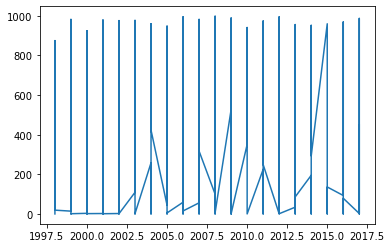

In [13]:
df.sort_values(['date'], inplace=True)
plt.plot(df.date.dt.year, df.number)

In [14]:
df.dtypes

state             object
number           float64
date      datetime64[ns]
dtype: object

In [15]:
# sort by 'state' and then 'date'
df.sort_values(['state', 'date'], inplace=True)

In [16]:
df_sum = df.drop(columns=['state']).set_index('date').sum(level='date')
#df.drop(columns=['state']).sum(level='date')

In [17]:
pd.set_option('display.max_rows', len(df_sum))
df_sum

,number
date,
1998-01-01,0.00
1998-02-01,0.00
1998-03-01,0.00
1998-04-01,0.00
1998-05-01,0.00
1998-06-01,1352.20
1998-07-01,4357.71
1998-08-01,3964.62
1998-09-01,3012.99


<AxesSubplot:xlabel='date'>

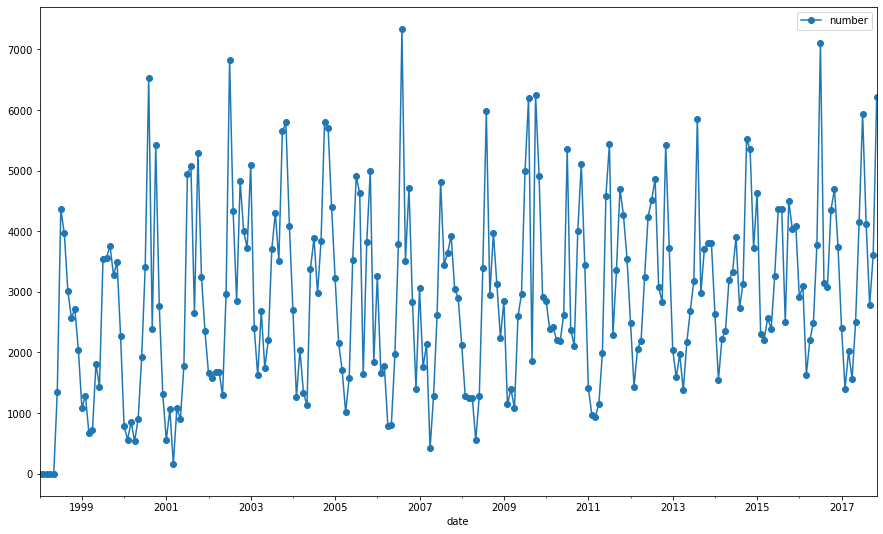

In [18]:
df_sum.plot(figsize=(15,9), style='o-')

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from matplotlib import pyplot as plt, rc_context, rc

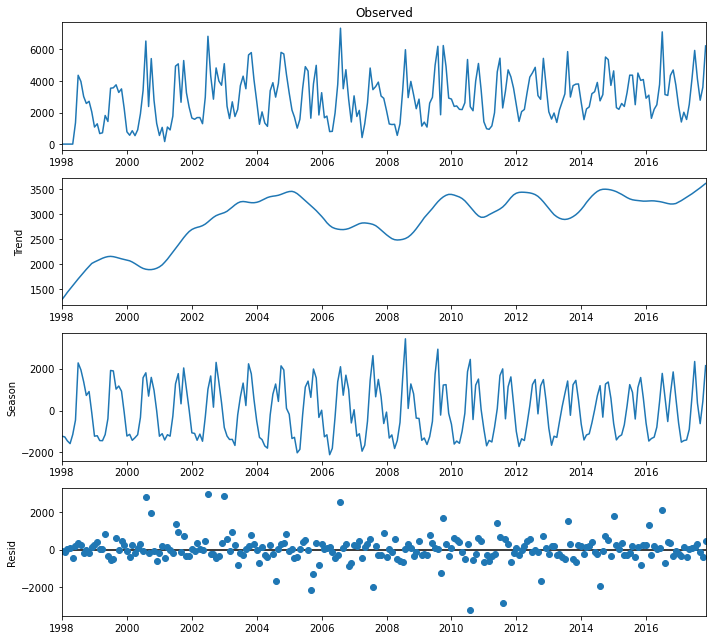

In [20]:
plt.rcParams.update({'figure.figsize':(10,9)})
#stl = STL(df_sum,period=12,robust=True)
stl = STL(df_sum,robust=True)
res = stl.fit()
fig = res.plot()

In [21]:
df_sum['date'] = df_sum.index 
df_sum.date.dt.month

date
1998-01-01     1
1998-02-01     2
1998-03-01     3
1998-04-01     4
1998-05-01     5
1998-06-01     6
1998-07-01     7
1998-08-01     8
1998-09-01     9
1998-10-01    10
1998-11-01    11
1998-12-01    12
1999-01-01     1
1999-02-01     2
1999-03-01     3
1999-04-01     4
1999-05-01     5
1999-06-01     6
1999-07-01     7
1999-08-01     8
1999-09-01     9
1999-10-01    10
1999-11-01    11
1999-12-01    12
2000-01-01     1
2000-02-01     2
2000-03-01     3
2000-04-01     4
2000-05-01     5
2000-06-01     6
2000-07-01     7
2000-08-01     8
2000-09-01     9
2000-10-01    10
2000-11-01    11
2000-12-01    12
2001-01-01     1
2001-02-01     2
2001-03-01     3
2001-04-01     4
2001-05-01     5
2001-06-01     6
2001-07-01     7
2001-08-01     8
2001-09-01     9
2001-10-01    10
2001-11-01    11
2001-12-01    12
2002-01-01     1
2002-02-01     2
2002-03-01     3
2002-04-01     4
2002-05-01     5
2002-06-01     6
2002-07-01     7
2002-08-01     8
2002-09-01     9
2002-10-01    10
2002-11-0

<AxesSubplot:xlabel='date', ylabel='number'>

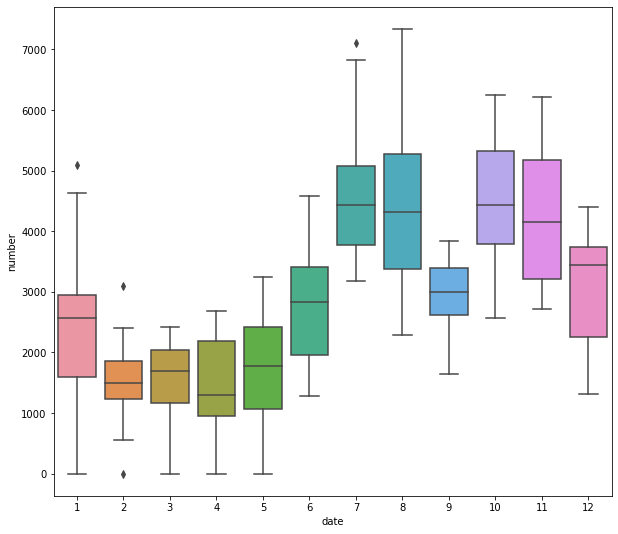

In [22]:
sns.boxplot(x=df_sum.date.dt.month, y=df_sum.number)

from statsmodels.tsa.seasonal import seasonal_decompose
#plt.rcParams.update({'figure.figsize':(10,9)})
result = seasonal_decompose(df_sum,model='additive',freq=1)
result.plot()

---
---

## Amazon Forest

The Amazon rainforest has about 5 million square kilometers, It occupys 60% of the Brazillian territory and is composed by the following states: 

Com cerca de 5 milhões de quilômetros quadrados, a floresta Amazônica ocupa 60% do território do Brasil, onde abrange os Estados do Acre, Amapá, Amazonas, Mato Grosso, Maranhão, Pará, Roraima, Rondônia e Tocantins.... - Veja mais em https://educacao.uol.com.br/disciplinas/ciencias/floresta-amazonica-a-maior-floresta-tropical-do-mundo.htm?cmpid=copiaecola


https://educacao.uol.com.br/disciplinas/ciencias/floresta-amazonica-a-maior-floresta-tropical-do-mundo.htm

Estados do Acre, Amapá, Amazonas, Mato Grosso, Maranhão, Pará, Roraima, Rondônia e Tocantins

In [23]:
df.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [24]:
#state_grp.getdf.drop(columns=['state']).set_index('date').sum(level='date')
#df_amazon = state_grp.get_group('Amazonas')#.drop(columns=['state']).set_index('date')

state_grp = df.groupby(['state'])

amazon_states = ['Amapa', 'Amazonas', 'Mato Grosso', 'Maranhao', 'Pará', 'Roraima', 'Rondonia', 'Tocantins']

df_amazon = pd.DataFrame()

for state in amazon_states:
    df_amazon = pd.concat([df_amazon, state_grp.get_group(state)])

In [25]:
df_amazon = df_amazon.drop(columns=['state']).set_index('date').sum(level='date')

In [26]:
# Renaming columns to comply with Prophet requirements.

df_amazon.reset_index(inplace=True)
df_amazon.rename(columns={'date':'ds', 'number':'y'}, inplace=True)
df_amazon

,ds,y
0,1998-01-01,0.00
1,1998-02-01,0.00
2,1998-03-01,0.00
3,1998-04-01,0.00
4,1998-05-01,0.00
5,1998-06-01,500.20
6,1998-07-01,2352.71
7,1998-08-01,579.40
8,1998-09-01,775.44
9,1998-10-01,1198.25


<AxesSubplot:xlabel='ds'>

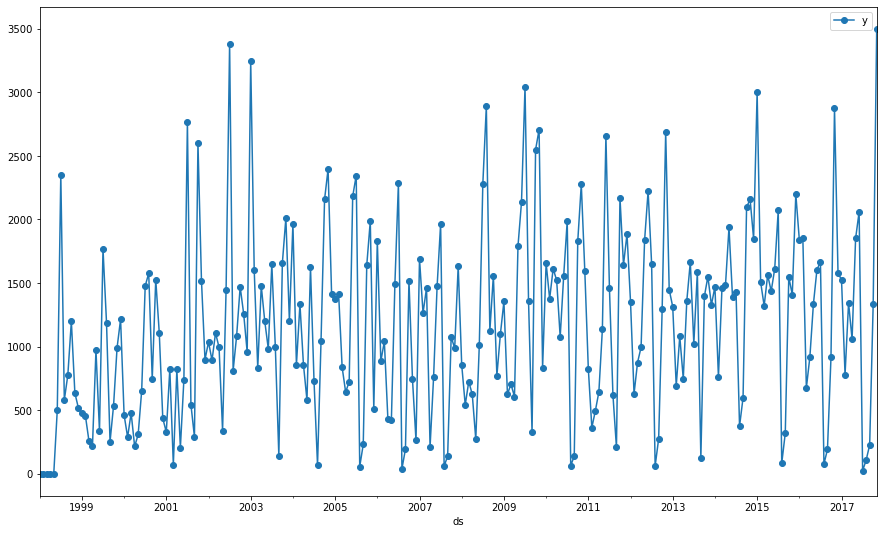

In [27]:
df_amazon.plot(x='ds', y='y', figsize=(15,9), style='o-')

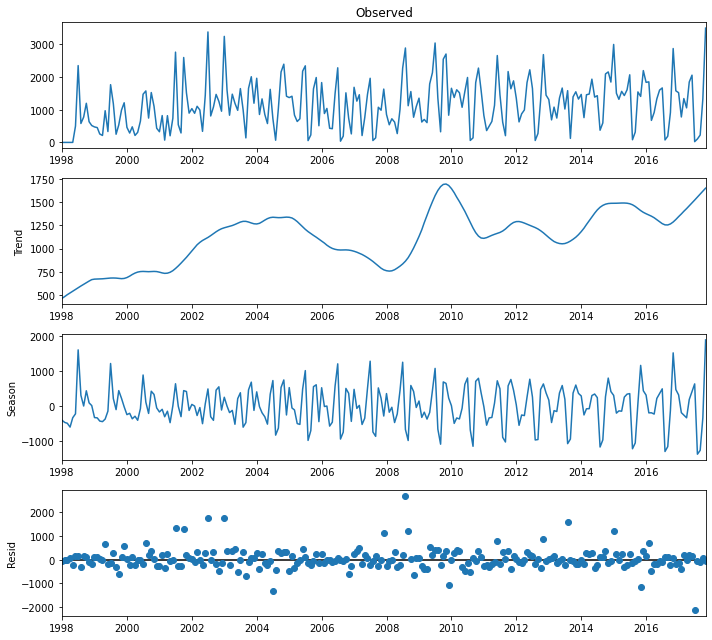

In [28]:
plt.rcParams.update({'figure.figsize':(10,9)})
stl = STL(df_amazon.set_index('ds'), period=12, robust=True)
res = stl.fit()
fig = res.plot()

In [29]:
SIZE_TRAIN = 0.8

train_end = int(len(df_amazon)*SIZE_TRAIN)

df_amazon_train = df_amazon.iloc[0: train_end]
df_amazon_test = df_amazon.iloc[train_end: :]

In [30]:
df_amazon.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [31]:
p = Prophet()
p.fit(df_amazon)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
forecast = p.predict(df_amazon_test)

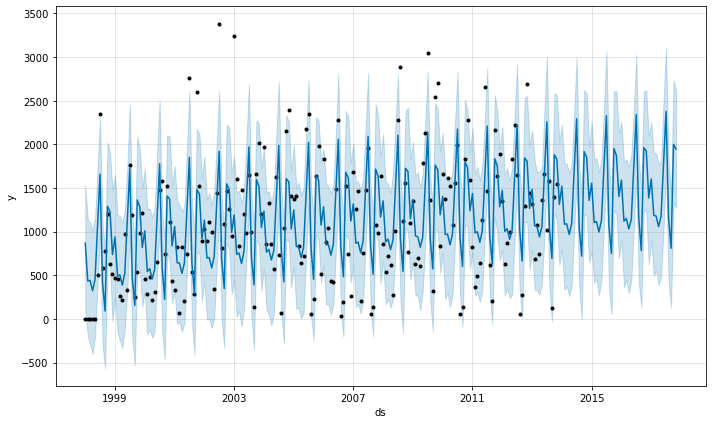

In [131]:
fig1 = p.plot(forecast)

In [145]:
#future = p.make_future_dataframe(periods=len(df_amazon_test), freq='M')
future = p.make_future_dataframe(periods=56, freq='MS')
forecast = p.predict(future)

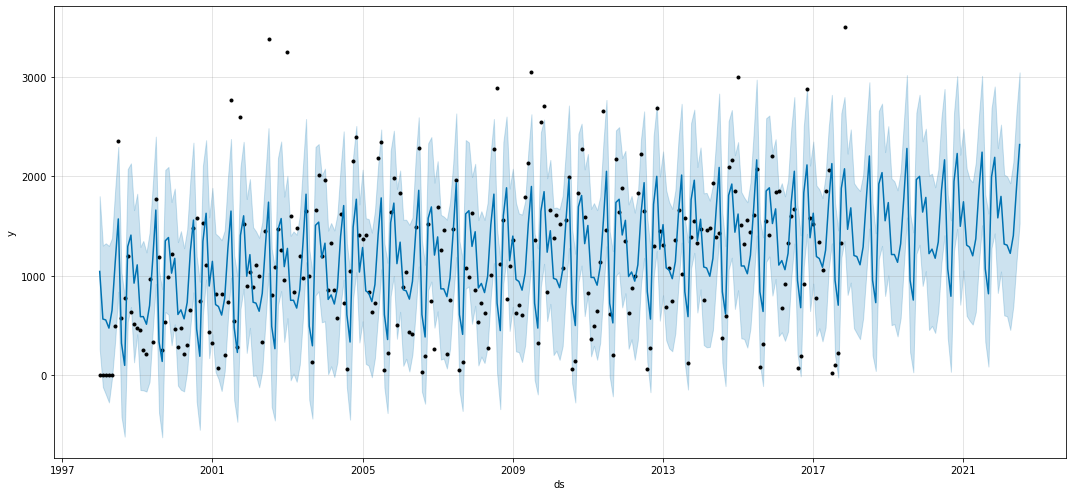

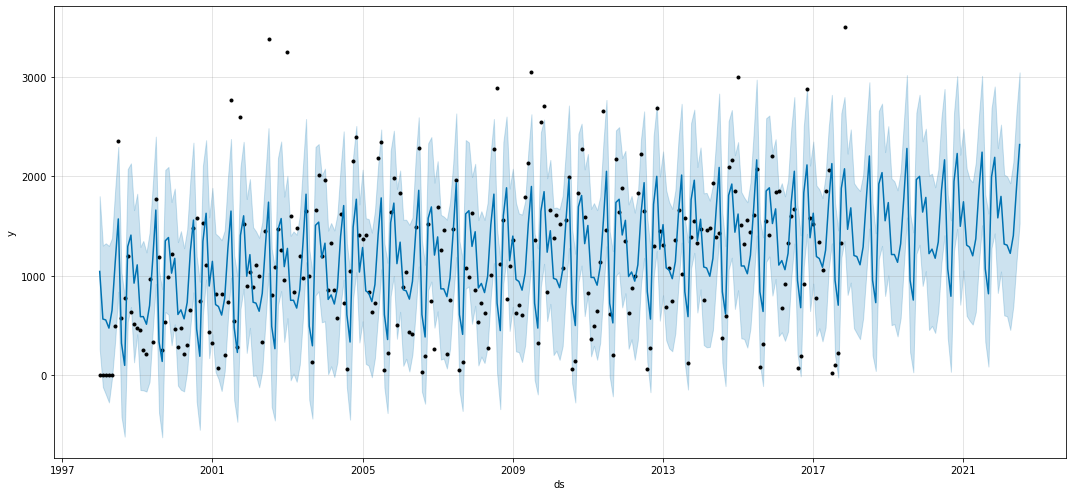

In [147]:
p.plot(forecast, figsize=(15,7), uncertainty=0.89)

In [142]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-01-01,798.68,262.57,1761.65,798.68,798.68,244.72,244.72,244.72,244.72,244.72,244.72,0.00,0.00,0.00,1043.40
1,1998-02-01,802.27,-203.37,1275.03,802.27,802.27,-236.76,-236.76,-236.76,-236.76,-236.76,-236.76,0.00,0.00,0.00,565.51
2,1998-03-01,805.51,-204.31,1273.71,805.51,805.51,-249.39,-249.39,-249.39,-249.39,-249.39,-249.39,0.00,0.00,0.00,556.12
3,1998-04-01,809.10,-258.03,1189.25,809.10,809.10,-334.66,-334.66,-334.66,-334.66,-334.66,-334.66,0.00,0.00,0.00,474.44
4,1998-05-01,812.57,-83.02,1440.31,812.57,812.57,-158.34,-158.34,-158.34,-158.34,-158.34,-158.34,0.00,0.00,0.00,654.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2022-02-28,1557.45,615.25,1978.05,1552.33,1562.54,-281.43,-281.43,-281.43,-281.43,-281.43,-281.43,0.00,0.00,0.00,1276.02
291,2022-03-31,1559.89,513.80,1965.00,1554.62,1565.16,-347.08,-347.08,-347.08,-347.08,-347.08,-347.08,0.00,0.00,0.00,1212.80
292,2022-04-30,1562.25,690.18,2156.87,1556.90,1567.69,-142.54,-142.54,-142.54,-142.54,-142.54,-142.54,0.00,0.00,0.00,1419.70
293,2022-05-31,1564.69,1107.72,2574.85,1559.13,1570.34,267.98,267.98,267.98,267.98,267.98,267.98,0.00,0.00,0.00,1832.66


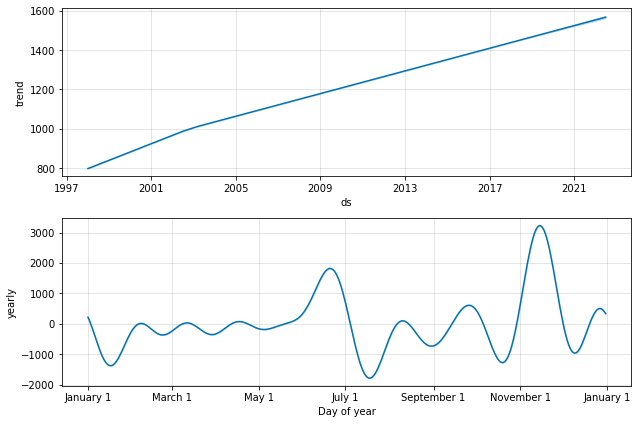

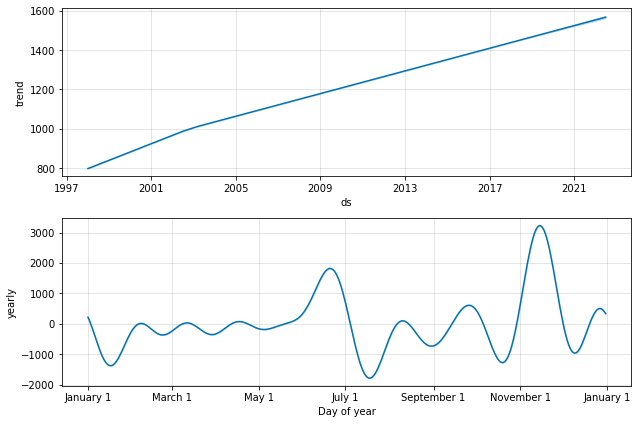

In [143]:
p.plot_components(forecast)

---
---

---
---

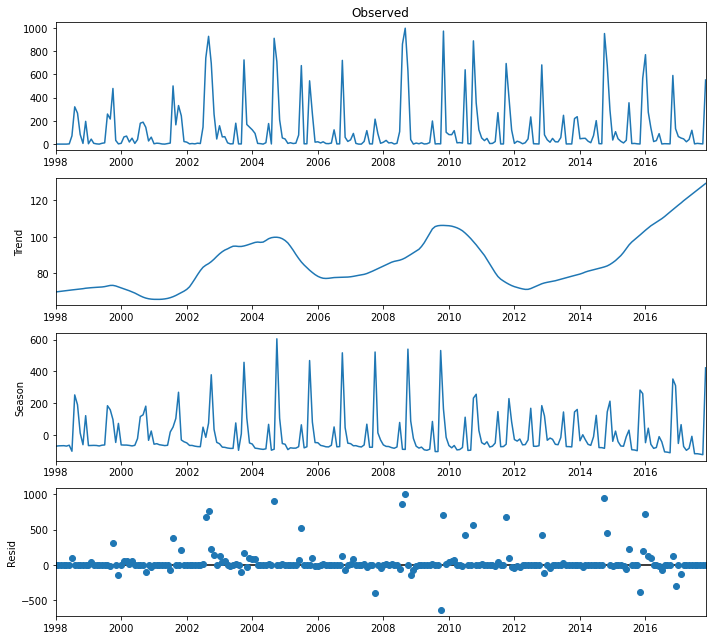

In [30]:
plt.rcParams.update({'figure.figsize':(10,9)})
stl = STL(df_amazonas,period=12,robust=True)
res = stl.fit()
fig = res.plot()

In [69]:
#state_grp.getdf.drop(columns=['state']).set_index('date').sum(level='date')
df_acre = state_grp.get_group('Acre').drop(columns=['state']).set_index('date')

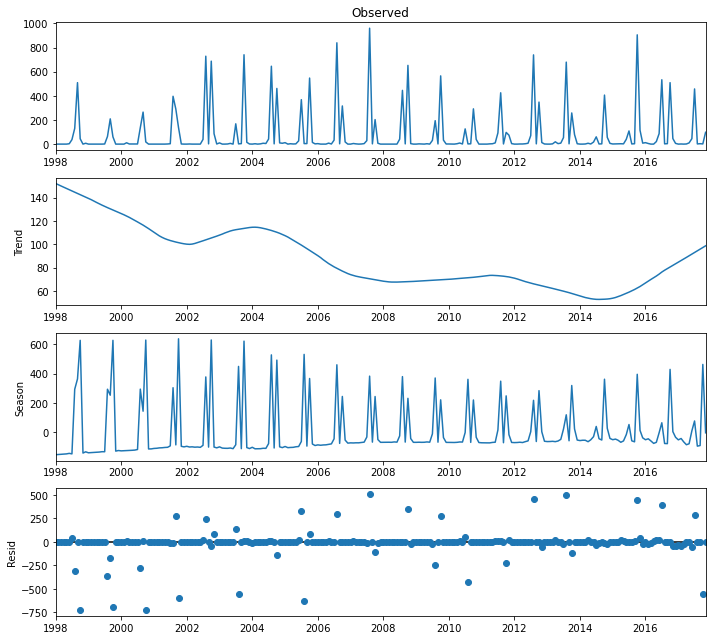

In [72]:
plt.rcParams.update({'figure.figsize':(10,9)})
stl = STL(df_acre,period=12,robust=True)
res = stl.fit()
fig = res.plot()

In [17]:
state_grp.get_group('Tocantins')

,state,number,date
6215,Tocantins,0.00,1998-01-01
6216,Tocantins,36.00,1999-01-01
6217,Tocantins,15.00,2000-01-01
6218,Tocantins,19.00,2001-01-01
6219,Tocantins,35.00,2002-01-01
...,...,...,...
6449,Tocantins,128.00,2012-12-01
6450,Tocantins,85.00,2013-12-01
6451,Tocantins,223.00,2014-12-01
6452,Tocantins,373.00,2015-12-01


In [18]:
df.loc[']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
6449   2012-01-01
6450   2013-01-01
6451   2014-01-01
6452   2015-01-01
6453   2016-01-01
Name: date, Length: 6454, dtype: datetime64[ns]

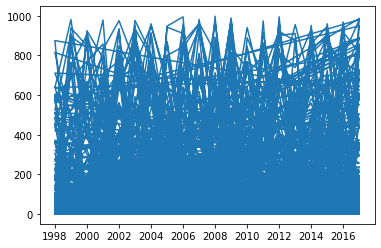

In [16]:
plt.plot(df.date, df.number)

In [27]:
state_grp = df.groupby(['state'])

In [22]:
state_grp.get_group('Acre')

,state,number,date
0,Acre,0.00,1998-01-01
20,Acre,0.00,1998-02-01
40,Acre,0.00,1998-03-01
60,Acre,0.00,1998-04-01
80,Acre,0.00,1998-05-01
...,...,...,...
139,Acre,457.00,2017-07-01
159,Acre,1.49,2017-08-01
179,Acre,3.43,2017-09-01
199,Acre,1.51,2017-10-01


In [30]:
df_acre = state_grp.get_group('Acre').copy().set_index('date')

,state,number
date,,
1998-01-01,Acre,0.00
1998-02-01,Acre,0.00
1998-03-01,Acre,0.00
1998-04-01,Acre,0.00
1998-05-01,Acre,0.00
...,...,...
2017-07-01,Acre,457.00
2017-08-01,Acre,1.49
2017-09-01,Acre,3.43


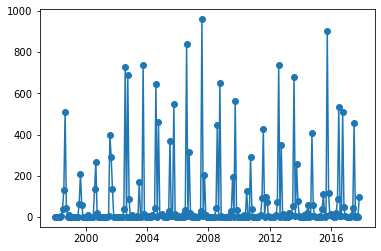

In [31]:
ts_acre_2016 = df_acre['2016-01-01':'2016-12-01'] 
ts_acre_2017 = df_acre['2017-01-01':'2017-12-01'] 

plt.plot(state_grp.get_group('Acre').date, state_grp.get_group('Acre').number, 'o-') 

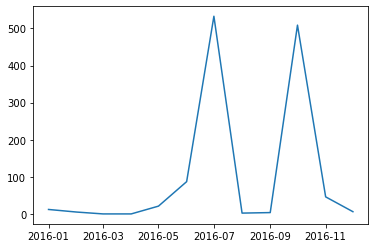

In [32]:
plt.plot(ts_acre_2016.index, ts_acre_2016.number)

In [25]:
# https://en.climate-data.org/south-america/brazil/acre/rio-branco-4000/#climate-graph
#temp = [25.4, 25.3, 25.3, 25, 24.4, 24.4, 25, 26.4, 27, 26.5, 25.8, 25.5]
#hum = [89, 89, 89, 89, 86, 82, 72, 66, 72, 81, 86, 88]
acre_weather = {'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'temperature': [25.4, 25.3, 25.3, 25, 24.4, 24.4, 25, 26.4, 27, 26.5, 25.8, 25.5],
                'humidity': [89, 89, 89, 89, 86, 82, 72, 66, 72, 81, 86, 88]
               } 